In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in list(coordinates):
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rikitea pf
samarai pg
hilo us
xining cn
jamestown sh
mataura pf
faya td
rikitea pf
norden de
yellowknife ca
busselton au
saint-philippe re
rikitea pf
samarai pg
presidencia roque saenz pena ar
busselton au
sobolevo ru
saint-francois gp
barentsburg sj
amderma ru
mataura pf
kahului us
atyuryevo ru
hobart au
busselton au
busselton au
hobart au
mataura pf
rawson ar
ribeira grande pt
rikitea pf
yellowknife ca
port alfred za
kapaa us
nemuro jp
saint-philippe re
guerrero negro mx
yellowknife ca
kruisfontein za
puerto ayora ec
te anau nz
ushuaia ar
atuona pf
avarua ck
rikitea pf
havre us
hope ca
avarua ck
hithadhoo mv
nizhneyansk ru
santa rosa bo
juba sd
khairpur nathan shah pk
saint-philippe re
ushuaia ar
pathein mm
ponta do sol cv
ushuaia ar
nurobod uz
rikitea pf
sur om
oussouye sn
tasiilaq gl
cape town za
ushuaia ar
moron mn
busselton au
pathein mm
dukat ru
rikitea pf
ushuaia ar
portland au
tateyama jp
tambo pe
guatire ve
georgetown sh
primo tapia mx
georgetown sh
kushiro jp
ngukurr au
pont

new norfolk au
san cristobal ec
geraldton au
hobart au
taolanaro mg
aykhal ru
kamenskoye ru
beian cn
butaritari ki
kushiro jp
albany au
san pedro co
ushuaia ar
trindade br
ponta delgada pt
port-cartier ca
balkanabat tm
kochubey ru
lively ca
cabo san lucas mx
cape town za
rikitea pf
inowroclaw pl
harper lr
lebanon us
tarko-sale ru
ushuaia ar
karauzyak uz
rikitea pf
hithadhoo mv
kupang id
taoudenni ml
black river jm
samusu ws
mukhen ru
tuktoyaktuk ca
faanui pf
sitka us
fortuna us
srednekolymsk ru
bengkulu id
busselton au
sao filipe cv
severo-kurilsk ru
kodiak us
dikson ru
yar-sale ru
ponte de sor pt
mar del plata ar
dikson ru
tessalit ml
padang id
aksu cn
vestmanna fo
esna eg
bousso td
beringovskiy ru
bogashevo ru
yellowknife ca
luderitz na
cidreira br
bengkulu id
almaznyy ru
pochutla mx
khatanga ru
mahebourg mu
cape town za
nizhneyansk ru
kodiak us
ahipara nz
thompson ca
saskylakh ru
balkhash kz
zambezi zm
punta arenas cl
provideniya ru
teguldet ru
dhidhdhoo mv
dawlatabad af
berdigestya

jamestown sh
guanare ve
lima pe
hermanus za
mataura pf
punta arenas cl
dryden ca
bambous virieux mu
bethel us
andevoranto mg
yabelo et
vanimo pg
half moon bay us
mrirt ma
tautira pf
bluff nz
korla cn
solnechnyy ru
yellowknife ca
cape town za


In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [22]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b0d3d05c33c230bf1502027afc304656


In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | samarai
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | xining
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | faya
Processing Record 8 of Set 1 | norden
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | presidencia roque saenz pena
Processing Record 13 of Set 1 | sobolevo
Processing Record 14 of Set 1 | saint-francois
Processing Record 15 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | kahului
Processing Record 18 of Set 1 | atyuryevo
City not found. Skipping...
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | rawson
Processing Record 21 of S

Processing Record 36 of Set 4 | torbay
Processing Record 37 of Set 4 | ilula
Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | alamosa
Processing Record 40 of Set 4 | aklavik
Processing Record 41 of Set 4 | rio gallegos
Processing Record 42 of Set 4 | duz
City not found. Skipping...
Processing Record 43 of Set 4 | okuchi
Processing Record 44 of Set 4 | vestmannaeyjar
Processing Record 45 of Set 4 | ponta pora
Processing Record 46 of Set 4 | la baule-escoublac
Processing Record 47 of Set 4 | phan thiet
Processing Record 48 of Set 4 | fort walton beach
Processing Record 49 of Set 4 | ovalle
Processing Record 50 of Set 4 | thompson
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | hastings
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | scottsburgh
City not found. Skipping...
Processing Record 5 of Set 5 | codrington
Processing Record 6 of Set 5 | ixtapa
Processing Record 7 of Set 5 | meyungs
City not found. Sk

Processing Record 26 of Set 8 | bousso
Processing Record 27 of Set 8 | beringovskiy
Processing Record 28 of Set 8 | bogashevo
Processing Record 29 of Set 8 | almaznyy
Processing Record 30 of Set 8 | ahipara
Processing Record 31 of Set 8 | balkhash
Processing Record 32 of Set 8 | zambezi
Processing Record 33 of Set 8 | dhidhdhoo
Processing Record 34 of Set 8 | dawlatabad
Processing Record 35 of Set 8 | berdigestyakh
Processing Record 36 of Set 8 | devonport
Processing Record 37 of Set 8 | southbridge
Processing Record 38 of Set 8 | wattegama
Processing Record 39 of Set 8 | manono
Processing Record 40 of Set 8 | hasaki
Processing Record 41 of Set 8 | galle
Processing Record 42 of Set 8 | freeport
Processing Record 43 of Set 8 | solnechnyy
Processing Record 44 of Set 8 | sofiysk
City not found. Skipping...
Processing Record 45 of Set 8 | breytovo
Processing Record 46 of Set 8 | chernaya kholunitsa
Processing Record 47 of Set 8 | klaksvik
Processing Record 48 of Set 8 | grand gaube
Process

Processing Record 16 of Set 12 | mabaruma
Processing Record 17 of Set 12 | malyye derbety
Processing Record 18 of Set 12 | khanpur
Processing Record 19 of Set 12 | morehead
Processing Record 20 of Set 12 | pontian kecil
Processing Record 21 of Set 12 | ugoofaaru
Processing Record 22 of Set 12 | huron
Processing Record 23 of Set 12 | ndjole
Processing Record 24 of Set 12 | chicama
Processing Record 25 of Set 12 | el alto
Processing Record 26 of Set 12 | rafai
Processing Record 27 of Set 12 | oistins
Processing Record 28 of Set 12 | cuetzalan
Processing Record 29 of Set 12 | acajutla
Processing Record 30 of Set 12 | darlawn
Processing Record 31 of Set 12 | mahibadhoo
Processing Record 32 of Set 12 | venado tuerto
Processing Record 33 of Set 12 | jumla
Processing Record 34 of Set 12 | dunkirk
Processing Record 35 of Set 12 | yambio
Processing Record 36 of Set 12 | sohbatpur
Processing Record 37 of Set 12 | juifang
City not found. Skipping...
Processing Record 38 of Set 12 | dingle
Process

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-03-14 01:53:33,-23.1203,-134.9692,80.49,73,24,8.39
1,Samarai,PG,2021-03-14 01:53:50,-10.6167,150.6667,83.39,74,100,14.20
2,Hilo,US,2021-03-14 01:53:51,19.7297,-155.0900,69.80,83,90,5.75
3,Xining,CN,2021-03-14 01:53:51,36.6167,101.7667,49.03,24,100,1.95
4,Jamestown,US,2021-03-14 01:53:52,42.0970,-79.2353,35.01,47,1,12.57
5,Mataura,NZ,2021-03-14 01:53:52,-46.1927,168.8643,75.00,43,40,15.01
6,Faya,SA,2021-03-14 01:53:53,18.3851,42.4509,62.60,31,90,1.25
7,Norden,DE,2021-03-14 01:53:53,53.6000,7.2000,39.99,83,100,8.99
8,Yellowknife,CA,2021-03-14 01:53:54,62.4560,-114.3525,1.00,85,90,8.05
9,Busselton,AU,2021-03-14 01:53:34,-33.6500,115.3333,64.99,60,0,5.01


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

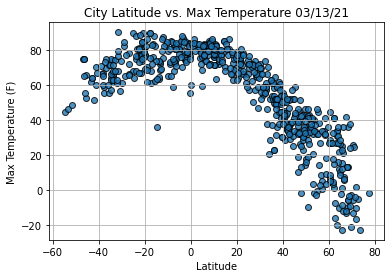

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

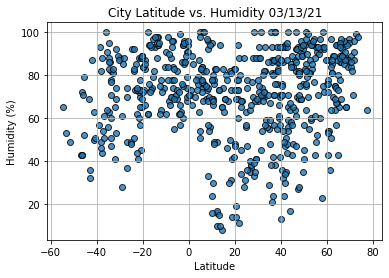

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

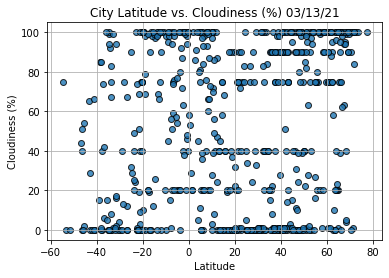

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

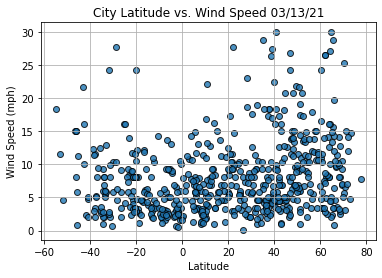

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [36]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [37]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [38]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

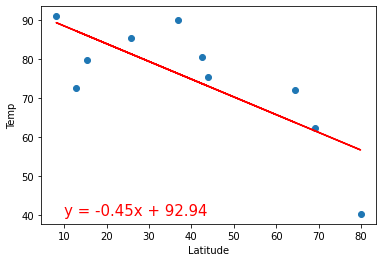

In [39]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [40]:
index13 = city_data_df.loc[13]
index13

City               Saint-Francois
Country                        FR
Date          2021-03-14 01:53:56
Lat                       46.4154
Lng                        3.9054
Max Temp                     39.2
Humidity                       87
Cloudiness                     90
Wind Speed                   8.05
Name: 13, dtype: object

In [41]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
594     True
595    False
596     True
597    False
598     True
Name: Lat, Length: 599, dtype: bool

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Hilo,US,2021-03-14 01:53:51,19.7297,-155.0900,69.80,83,90,5.75
3,Xining,CN,2021-03-14 01:53:51,36.6167,101.7667,49.03,24,100,1.95
4,Jamestown,US,2021-03-14 01:53:52,42.0970,-79.2353,35.01,47,1,12.57
6,Faya,SA,2021-03-14 01:53:53,18.3851,42.4509,62.60,31,90,1.25
7,Norden,DE,2021-03-14 01:53:53,53.6000,7.2000,39.99,83,100,8.99


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

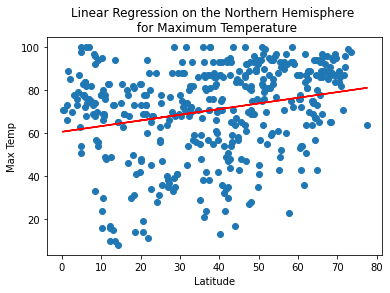

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(40,0))

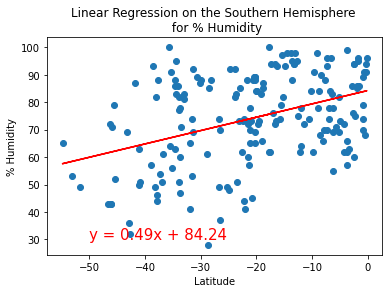

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50, 30))

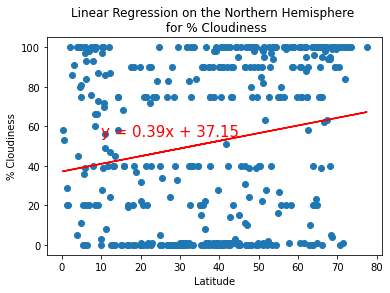

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

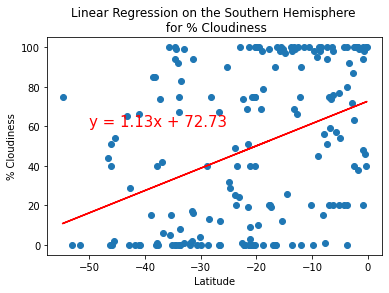

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

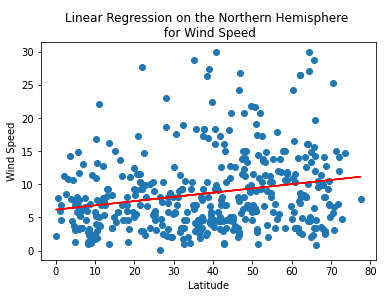

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

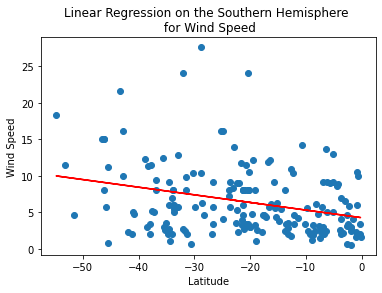

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))